<a href="https://colab.research.google.com/github/SouparnaChatterjee/Meta-AIML/blob/main/MiniProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading dataset and reading the 5 rows
data=pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#to obtain shape and dimensions of dataset
data.shape

(8425, 23)

In [ ]:
#statistical description of data
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


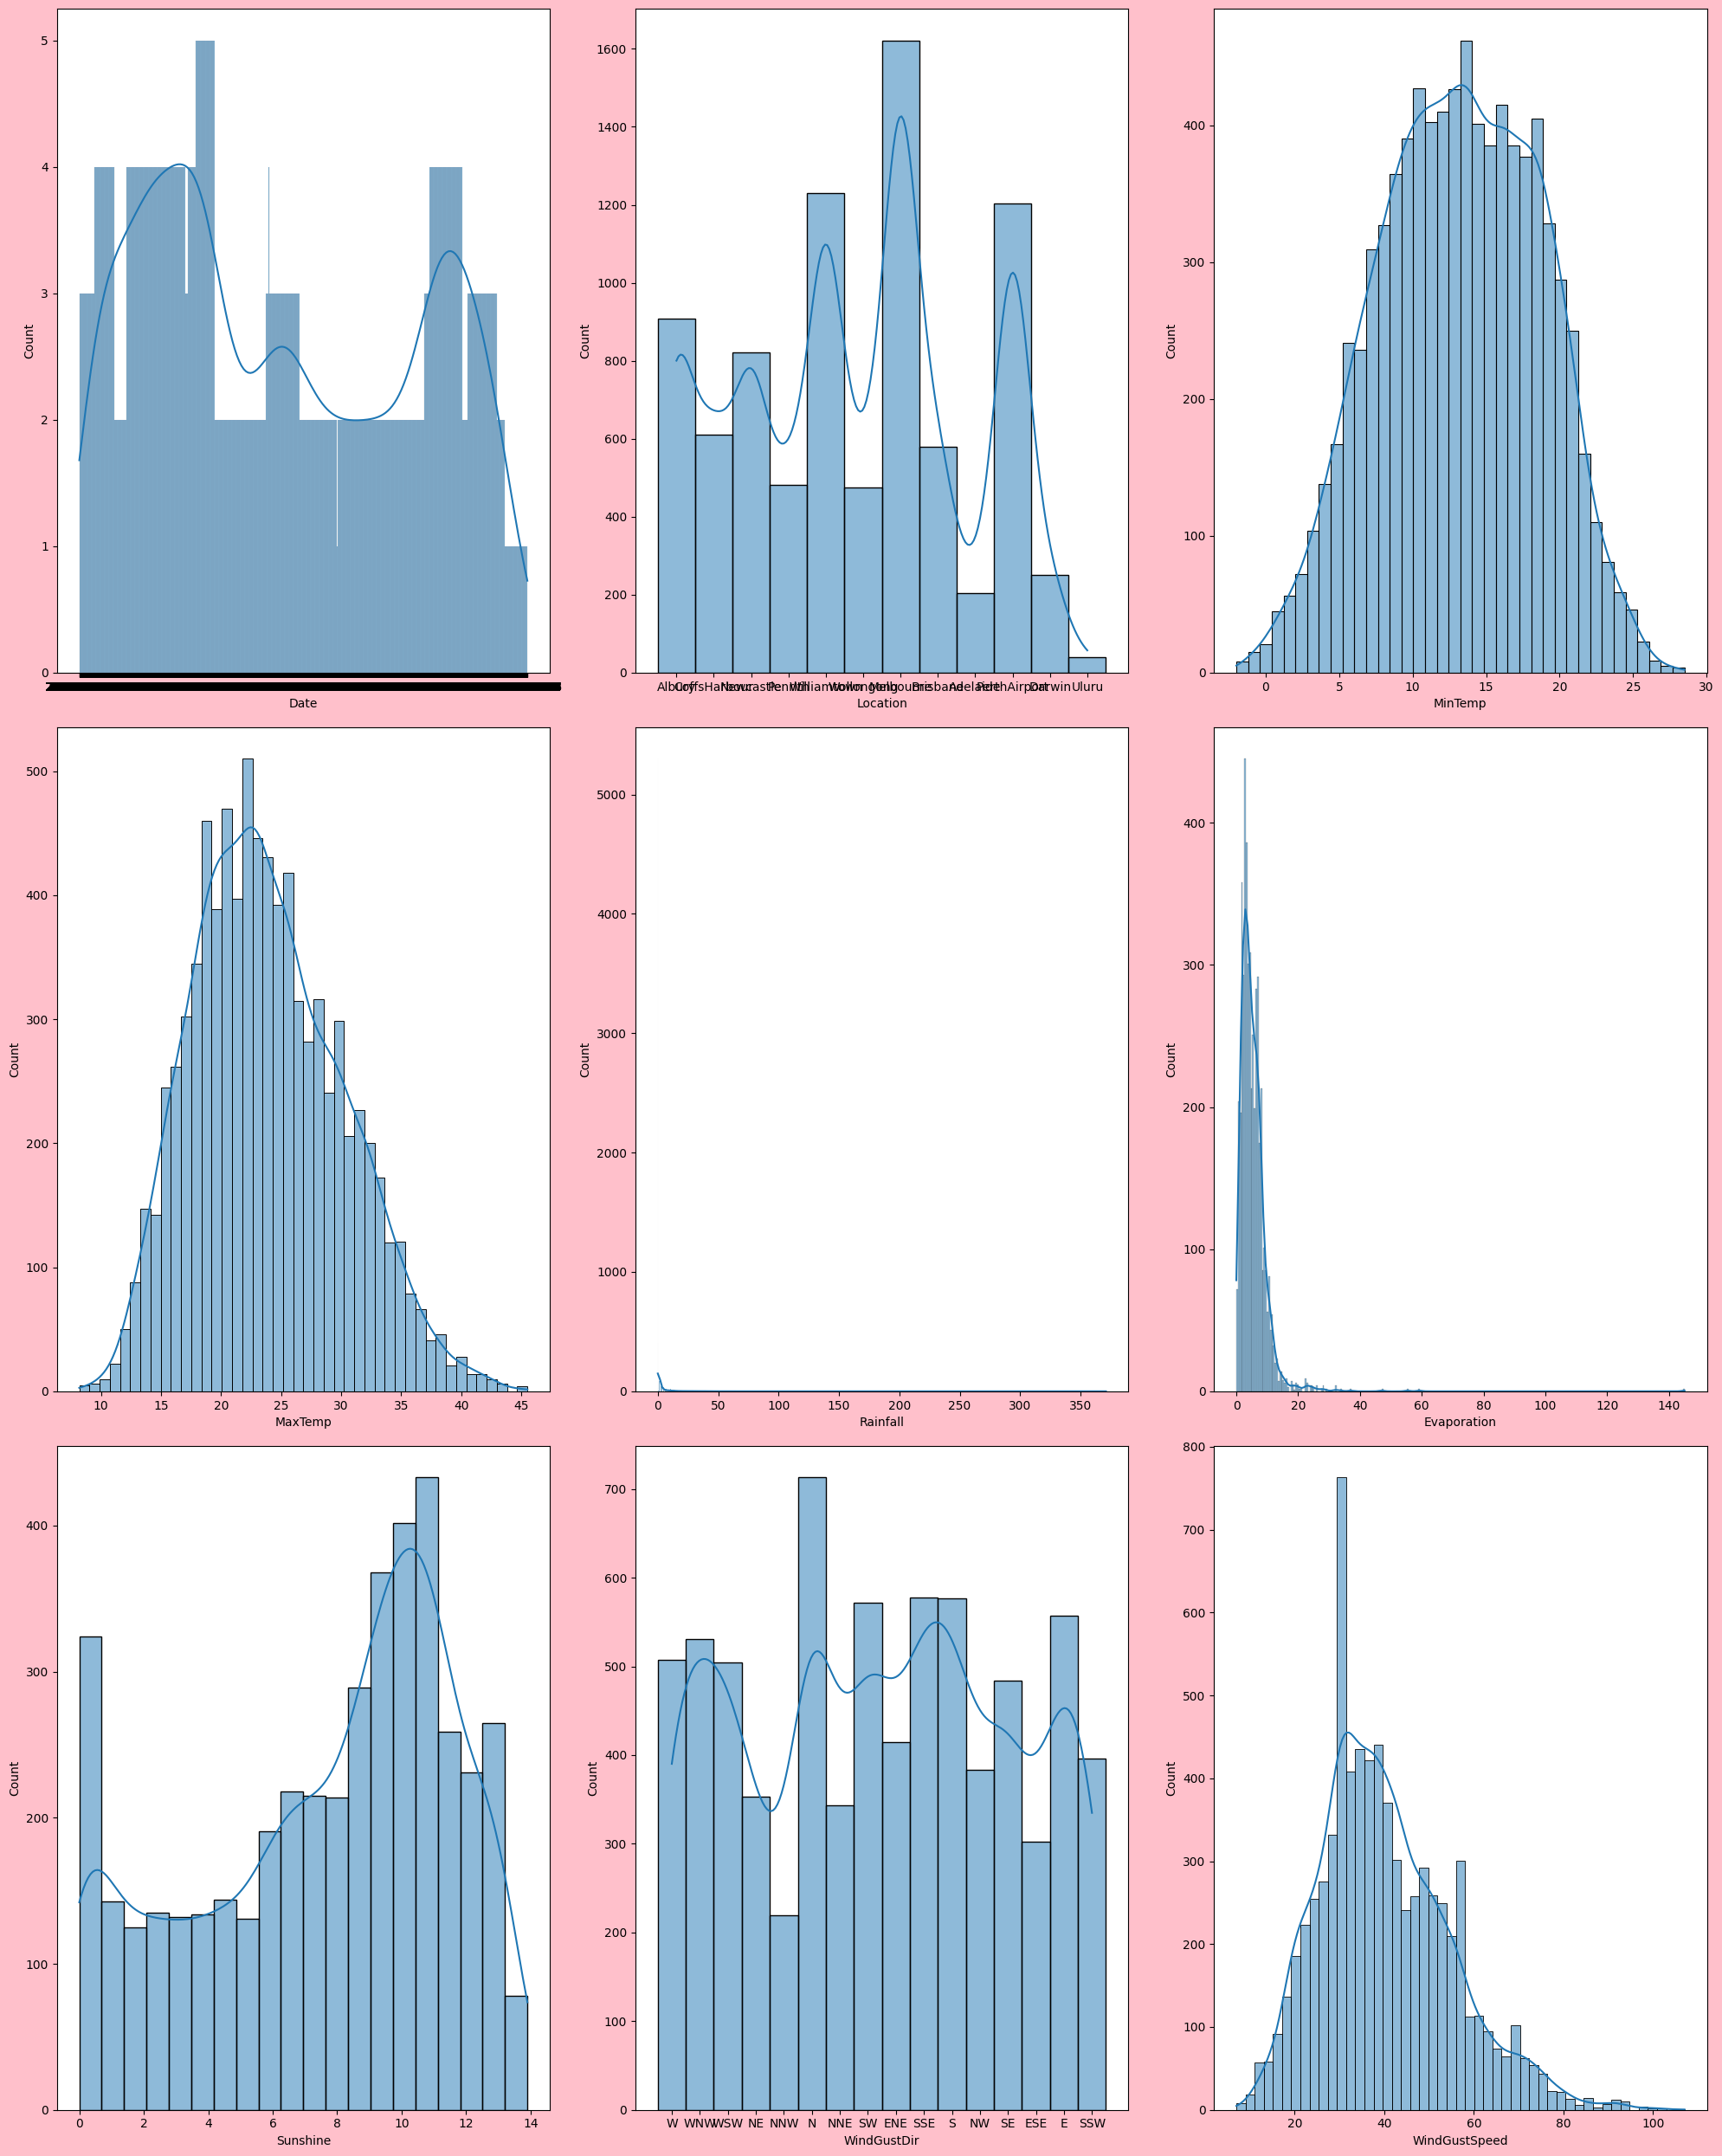

In [ ]:

plt.figure(figsize=(20, 25), facecolor='pink')  # Facecolor is set to pink

for i, column in enumerate(data.columns[:9], 1):  # Enumerate starting from 1 for subplot indexing
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.xlabel(column)

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


In [ ]:

import pandas as pd

# Load the dataset
data = pd.read_csv("weatherAUS.csv")

# Check for null values
print("Null values in each column:\n", data.isnull().sum())

# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Handle missing values for numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Handle missing values for categorical columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Fill with the mode

# Check if there are any missing values left
print("Null values after handling:\n", data.isnull().sum())

Null values in each column:
 Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64
Null values after handling:
 Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainT

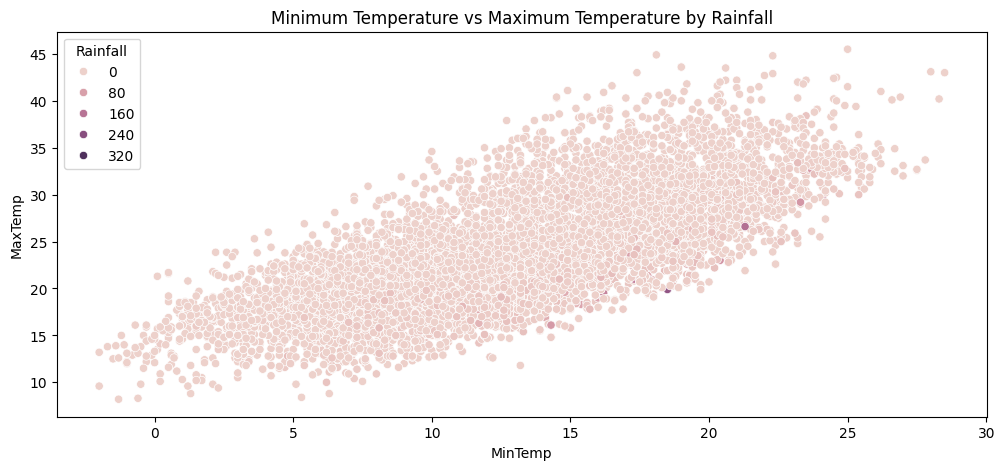

In [ ]:
# Scatter plots for temperature and rainfall relationships
plt.figure(figsize=(12, 5))
sns.scatterplot(data=data, x='MinTemp', y='MaxTemp', hue='Rainfall')
plt.title('Minimum Temperature vs Maximum Temperature by Rainfall')
plt.show()

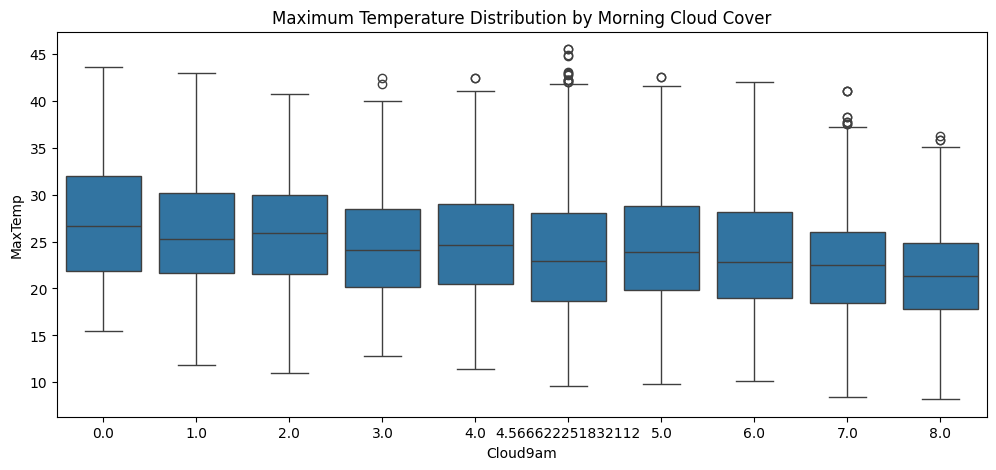

In [ ]:

# Box plots for temperature distribution across different pressure levels
plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='Cloud9am', y='MaxTemp')
plt.title('Maximum Temperature Distribution by Morning Cloud Cover')
plt.show()

Text(0.5, 1.0, 'Rainfall Distribution')

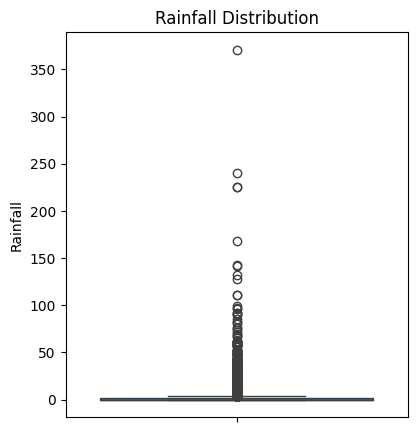

In [ ]:

# Additional interesting relationships
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=data, y='Rainfall')
plt.title('Rainfall Distribution')

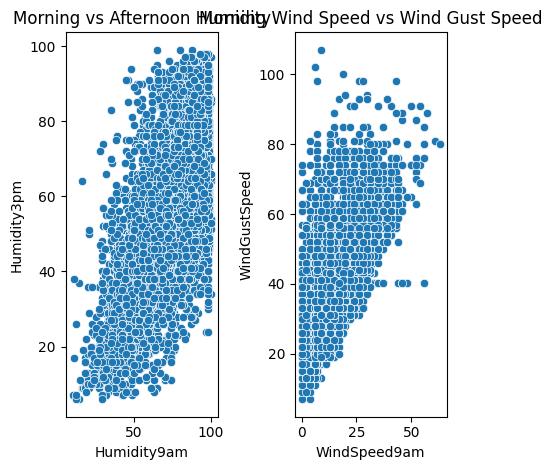

In [ ]:
#plots of humidities and wind speeds
plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='Humidity9am', y='Humidity3pm')
plt.title('Morning vs Afternoon Humidity')

plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='WindSpeed9am', y='WindGustSpeed')
plt.title('Morning Wind Speed vs Wind Gust Speed')

plt.tight_layout()
plt.show()

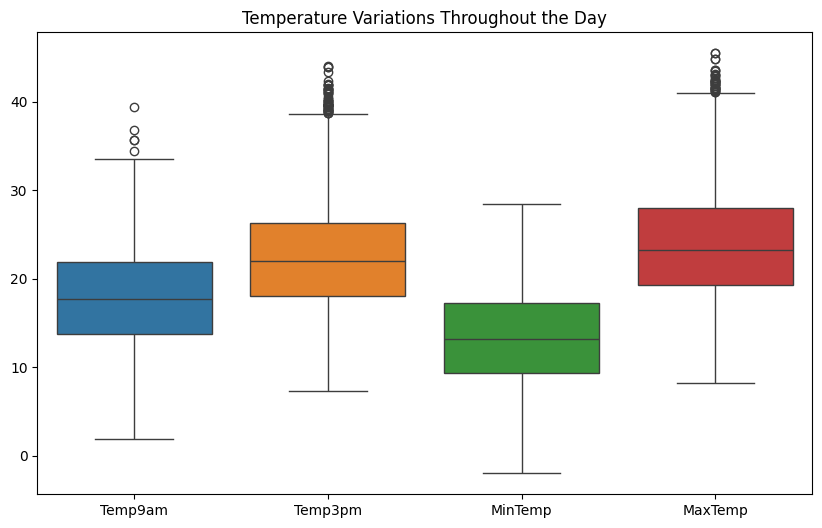

In [ ]:
# Temperature variations throughout the day
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp']])
plt.title('Temperature Variations Throughout the Day')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Create copy of dataframe
df_model = data.copy()

# Handle missing values
numeric_cols = df_model.select_dtypes(include=['float64', 'int64']).columns
df_model[numeric_cols] = df_model[numeric_cols].fillna(df_model[numeric_cols].mean())

# Encode categorical variables
le = LabelEncoder()
categorical_cols = df_model.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Let's predict RainTomorrow (assuming this is our target variable)
# Split features and target
X = df_model.drop(['RainTomorrow', 'Date'], axis=1)  # Remove Date column as it's not relevant for prediction
y = df_model['RainTomorrow']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to dataframe for better handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print shapes to verify
print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)

# Check for any remaining missing values
print("\nMissing values in training set:\n", X_train_scaled.isnull().sum().sum())
print("Missing values in testing set:\n", X_test_scaled.isnull().sum().sum())

# Display first few rows of processed data
print("\nFirst few rows of processed training data:")
print(X_train_scaled.head())

Training set shape: (6740, 21)
Testing set shape: (1685, 21)

Missing values in training set:
 0
Missing values in testing set:
 0

First few rows of processed training data:
   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  0.692079  0.547603  0.869141 -0.279081     0.838581 -0.144237    -0.685439   
1  0.058042  0.006346  1.622965 -0.279081     0.004242  0.008558    -0.897807   
2 -0.258977 -1.035187 -1.703693 -0.001626    -0.824220 -2.265377     1.438243   
3 -0.893015 -0.551040 -0.900707 -0.279081    -0.657940 -0.285646     0.164034   
4  0.058042 -1.910377  0.010433 -0.279081     0.004242  0.008558    -0.897807   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  Humidity9am  \
0       0.059069   -1.363820   -0.634128  ...     -0.160616    -1.303525   
1      -0.000900   -0.928689    0.269805  ...     -0.002680    -0.005862   
2       1.657216   -0.058426    1.173739  ...      2.104934    -0.768345   
3       0.567570    1.029402    0.

Model Performance Evaluation:

Logistic Regression:
Cross-validation accuracy: 0.8270 (+/- 0.0273)
Test set accuracy: 0.8528
ROC AUC Score: 0.8667

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1314
           1       0.73      0.53      0.61       371

    accuracy                           0.85      1685
   macro avg       0.80      0.74      0.76      1685
weighted avg       0.84      0.85      0.84      1685


Random Forest:
Cross-validation accuracy: 0.8785 (+/- 0.0211)
Test set accuracy: 0.9128
ROC AUC Score: 0.9391

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1314
           1       0.86      0.72      0.78       371

    accuracy                           0.91      1685
   macro avg       0.89      0.84      0.86      1685
weighted avg       0.91      0.91      0.91      1685


Gradient Boosting:
Cross-validation acc

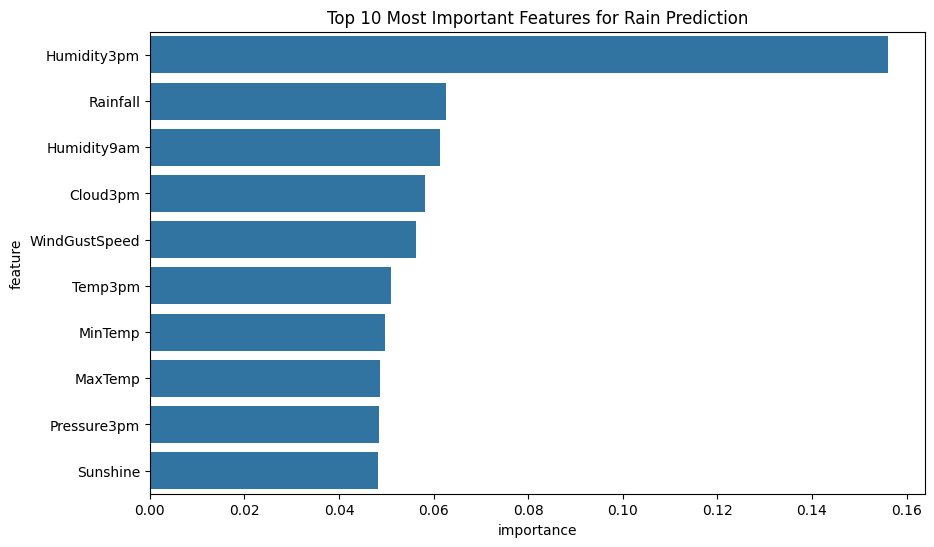

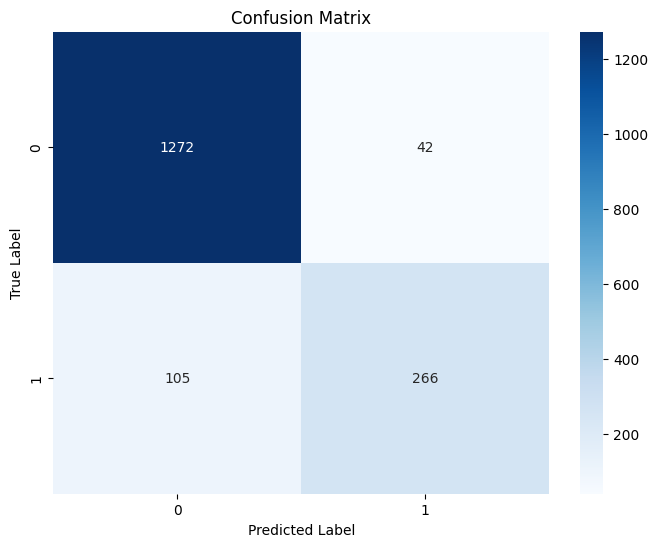

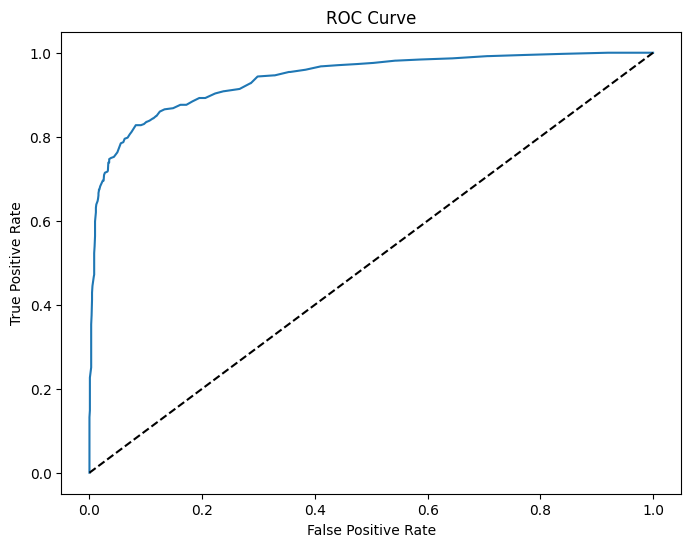

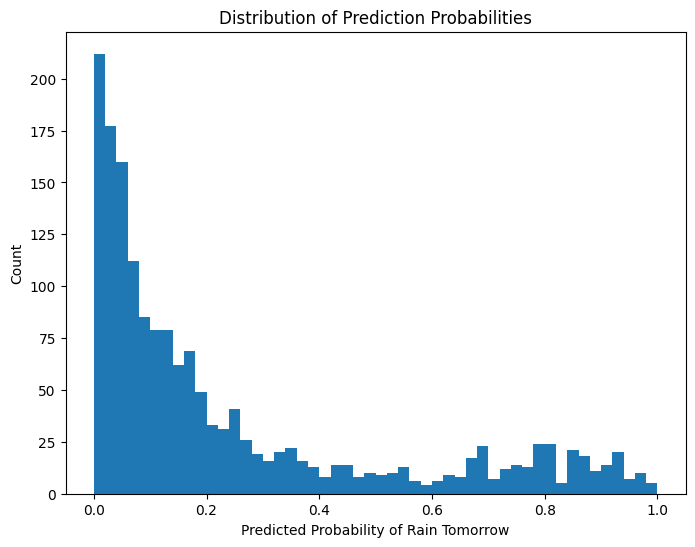

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
import numpy as np

# Define models for comparison
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Perform cross-validation and training
print("Model Performance Evaluation:")
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

    print(f'\n{name}:')
    print(f'Cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})')
    print(f'Test set accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'ROC AUC Score: {roc_auc:.4f}')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

# Feature importance analysis for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features for Rain Prediction')
plt.show()

# Additional analysis for the best performing model
best_model = models['Random Forest']  # Assuming Random Forest performs best

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, best_model.predict(X_test_scaled))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Probability distribution of predictions
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
plt.figure(figsize=(8, 6))
plt.hist(y_prob, bins=50)
plt.title('Distribution of Prediction Probabilities')
plt.xlabel('Predicted Probability of Rain Tomorrow')
plt.ylabel('Count')
plt.show()


Logistic Regression Results:
Training Accuracy: 0.8283
Testing Accuracy: 0.8528
Training ROC AUC: 0.8515
Testing ROC AUC: 0.8667

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1314
           1       0.73      0.53      0.61       371

    accuracy                           0.85      1685
   macro avg       0.80      0.74      0.76      1685
weighted avg       0.84      0.85      0.84      1685


Random Forest Results:
Training Accuracy: 0.9999
Testing Accuracy: 0.9128
Training ROC AUC: 0.9999
Testing ROC AUC: 0.9391

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1314
           1       0.86      0.72      0.78       371

    accuracy                           0.91      1685
   macro avg       0.89      0.84      0.86      1685
weighted avg       0.91      0.91      0.91      1685


Gradient Boosting Results:
Training Accurac

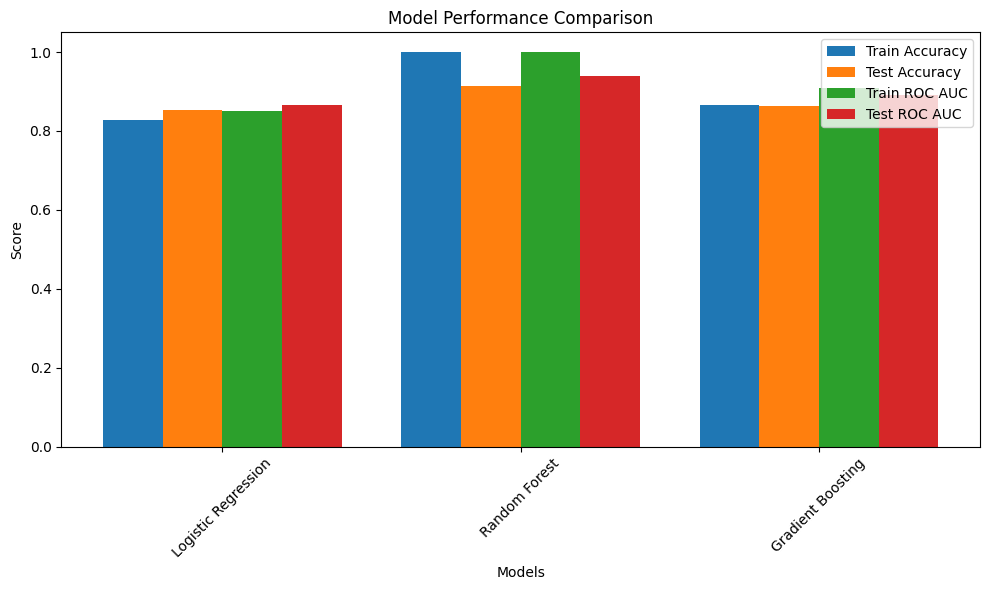


Best performing model: Random Forest
Test ROC AUC: 0.9391


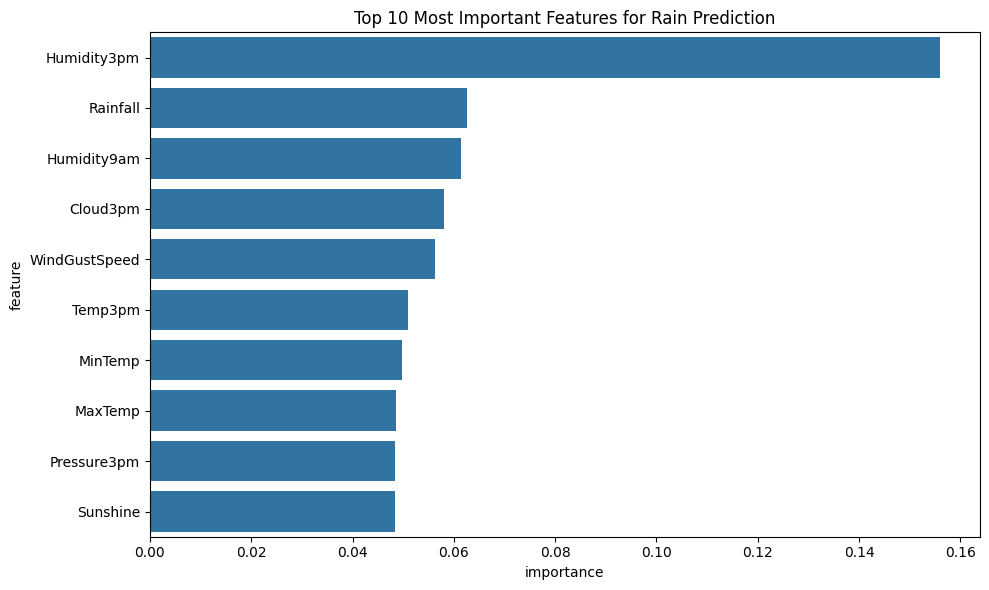

In [ ]:
# First, import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Define the models as a dictionary (not a list)
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Now train models and collect results
results = {}
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)

    # Get probabilities for ROC AUC
    train_proba = model.predict_proba(X_train_scaled)[:, 1]
    test_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    results[name] = {
        'train_accuracy': accuracy_score(y_train, train_pred),
        'test_accuracy': accuracy_score(y_test, test_pred),
        'train_roc_auc': roc_auc_score(y_train, train_proba),
        'test_roc_auc': roc_auc_score(y_test, test_proba)
    }

    print(f'\n{name} Results:')
    print(f'Training Accuracy: {results[name]["train_accuracy"]:.4f}')
    print(f'Testing Accuracy: {results[name]["test_accuracy"]:.4f}')
    print(f'Training ROC AUC: {results[name]["train_roc_auc"]:.4f}')
    print(f'Testing ROC AUC: {results[name]["test_roc_auc"]:.4f}')
    print('\nClassification Report:')
    print(classification_report(y_test, test_pred))

# Visualize results
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
train_acc = [results[model]['train_accuracy'] for model in model_names]
test_acc = [results[model]['test_accuracy'] for model in model_names]
train_auc = [results[model]['train_roc_auc'] for model in model_names]
test_auc = [results[model]['test_roc_auc'] for model in model_names]

x = np.arange(len(model_names))
width = 0.2

plt.bar(x - width*1.5, train_acc, width, label='Train Accuracy')
plt.bar(x - width/2, test_acc, width, label='Test Accuracy')
plt.bar(x + width/2, train_auc, width, label='Train ROC AUC')
plt.bar(x + width*1.5, test_auc, width, label='Test ROC AUC')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Select best model based on test ROC AUC
best_model_name = max(results, key=lambda x: results[x]['test_roc_auc'])
print(f"\nBest performing model: {best_model_name}")
print(f"Test ROC AUC: {results[best_model_name]['test_roc_auc']:.4f}")

# Feature importance for Random Forest model
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X_train_scaled.columns,
        'importance': rf_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title('Top 10 Most Important Features for Rain Prediction')
    plt.tight_layout()
    plt.show()

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define Random Forest model for tuning
rf_tune = RandomForestClassifier(random_state=42)

# Define parameter grid for classification
param_grid = {
    'n_estimators': [150, 250, 350],
    'max_depth': [8, 15, 25],
    'min_samples_split': [3, 6, 9],
    'min_samples_leaf': [2, 3, 5],
    'max_features': ['sqrt', 'log2']
}

# Perform GridSearchCV
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=rf_tune,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc',  # Changed to ROC AUC for classification
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Print best parameters
print("\nBest Parameters Found:")
print(grid_search.best_params_)

# Get best model
best_rf_model = grid_search.best_estimator_

# Comprehensive Model Evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Get predictions
train_predictions = best_rf_model.predict(X_train_scaled)
test_predictions = best_rf_model.predict(X_test_scaled)

# Calculate probabilities for ROC AUC
train_proba = best_rf_model.predict_proba(X_train_scaled)[:, 1]
test_proba = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate various metrics
print("\nFinal Model Performance Metrics:")
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, train_predictions):.4f}")
print(f"ROC AUC: {roc_auc_score(y_train, train_proba):.4f}")
print("\nClassification Report (Training):")
print(classification_report(y_train, train_predictions))

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_score(y_test, test_predictions):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, test_proba):.4f}")
print("\nClassification Report (Testing):")
print(classification_report(y_test, test_predictions))

# Cross-validation of final model
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("\nCross-validation Results of Final Model:")
print(f"Individual scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Starting Grid Search...
Fitting 5 folds for each of 162 candidates, totalling 810 fits

Best Parameters Found:
{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 350}

Final Model Performance Metrics:
Training Metrics:
Accuracy: 0.9872
ROC AUC: 0.9999

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5120
           1       1.00      0.95      0.97      1620

    accuracy                           0.99      6740
   macro avg       0.99      0.97      0.98      6740
weighted avg       0.99      0.99      0.99      6740


Testing Metrics:
Accuracy: 0.9116
ROC AUC: 0.9359

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1314
           1       0.87      0.70      0.78       371

    accuracy                           0.91      1685
   macro avg       0.90      

In [22]:
# Import required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define Random Forest model for tuning
rf_tune = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [150, 250, 350],
    'max_depth': [8, 15, 25],
    'min_samples_split': [3, 6, 9],
    'min_samples_leaf': [2, 3, 5],
    'max_features': ['sqrt', 'log2']
}

In [25]:

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
print("Training Random Forest model...")
rf_model.fit(X_train_scaled, y_train)

# Use this as your best model
best_rf_model = rf_model

Training Random Forest model...


In [26]:
# Get predictions
train_predictions = best_rf_model.predict(X_train_scaled)
test_predictions = best_rf_model.predict(X_test_scaled)

# Get probabilities
train_proba = best_rf_model.predict_proba(X_train_scaled)[:, 1]
test_proba = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Print metrics
print("\nFinal Model Performance Metrics:")
print("Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, train_predictions):.4f}")
print(f"ROC AUC: {roc_auc_score(y_train, train_proba):.4f}")
print("\nClassification Report (Training):")
print(classification_report(y_train, train_predictions))

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_score(y_test, test_predictions):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, test_proba):.4f}")
print("\nClassification Report (Testing):")
print(classification_report(y_test, test_predictions))


Final Model Performance Metrics:
Training Metrics:
Accuracy: 0.9237
ROC AUC: 0.9757

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5120
           1       0.98      0.70      0.81      1620

    accuracy                           0.92      6740
   macro avg       0.95      0.85      0.88      6740
weighted avg       0.93      0.92      0.92      6740


Testing Metrics:
Accuracy: 0.8855
ROC AUC: 0.9151

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1314
           1       0.85      0.58      0.69       371

    accuracy                           0.89      1685
   macro avg       0.87      0.78      0.81      1685
weighted avg       0.88      0.89      0.88      1685



In [27]:
# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("\nCross-validation Results:")
print(f"Individual scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Cross-validation Results:
Individual scores: [0.8927228  0.88800426 0.90014648 0.8771611  0.89873288]
Average CV score: 0.8914 (+/- 0.0166)


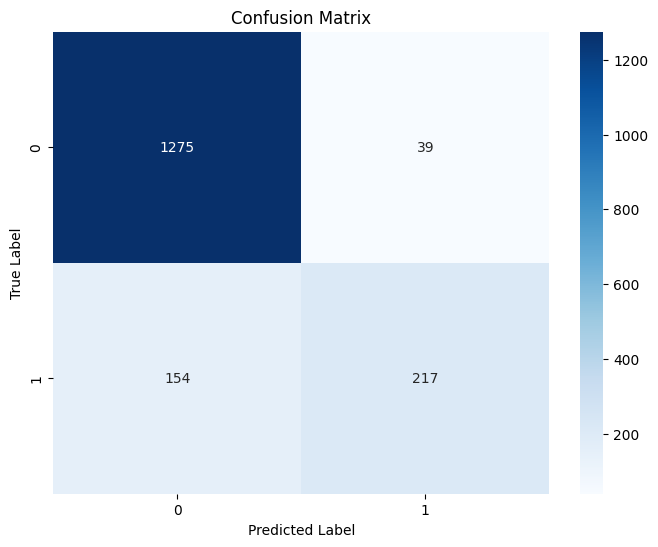

In [28]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

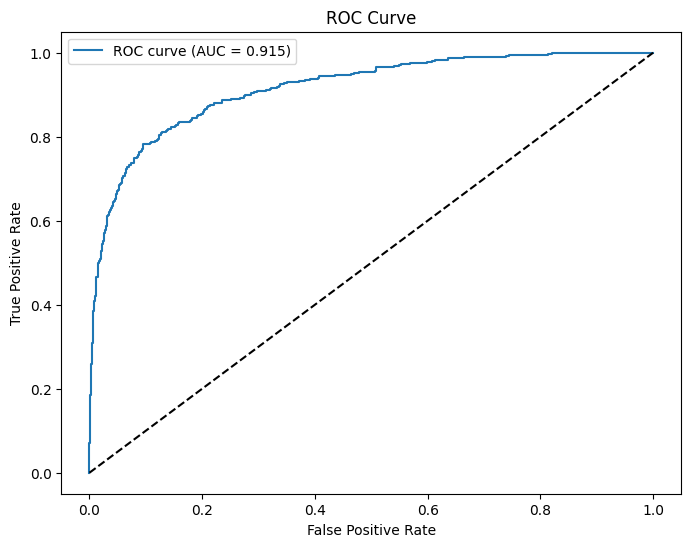

In [29]:
# Plot ROC curve
from sklearn.metrics import roc_curve

plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, test_proba)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, test_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

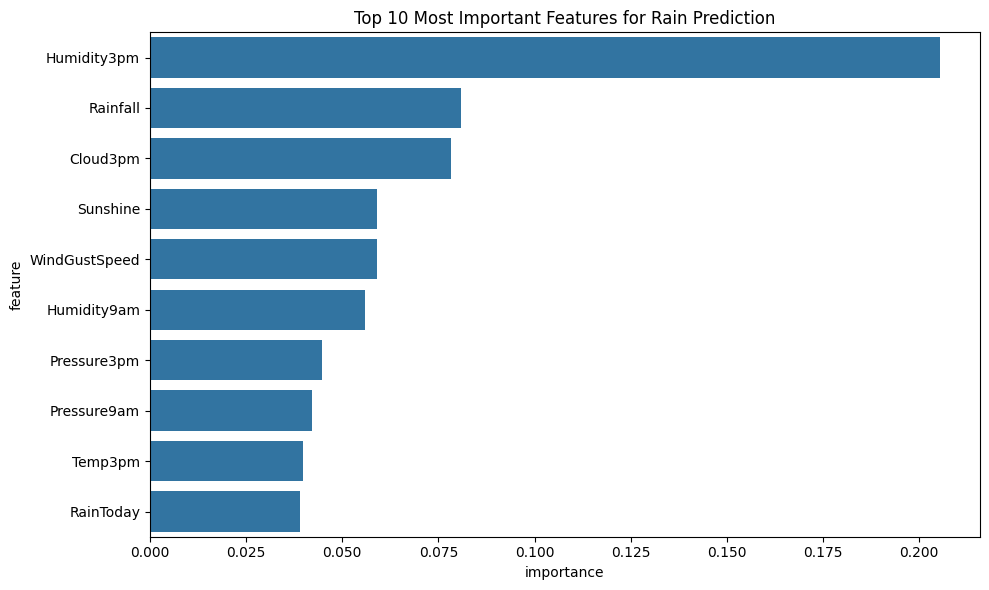

In [30]:
# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': best_rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features for Rain Prediction')
plt.tight_layout()
plt.show()


Top 10 Most Important Features for Rain Prediction:
      feature  importance
  Humidity3pm    0.205531
     Rainfall    0.080853
     Cloud3pm    0.078308
     Sunshine    0.059159
WindGustSpeed    0.058930
  Humidity9am    0.055912
  Pressure3pm    0.044735
  Pressure9am    0.042262
      Temp3pm    0.039861
    RainToday    0.039006


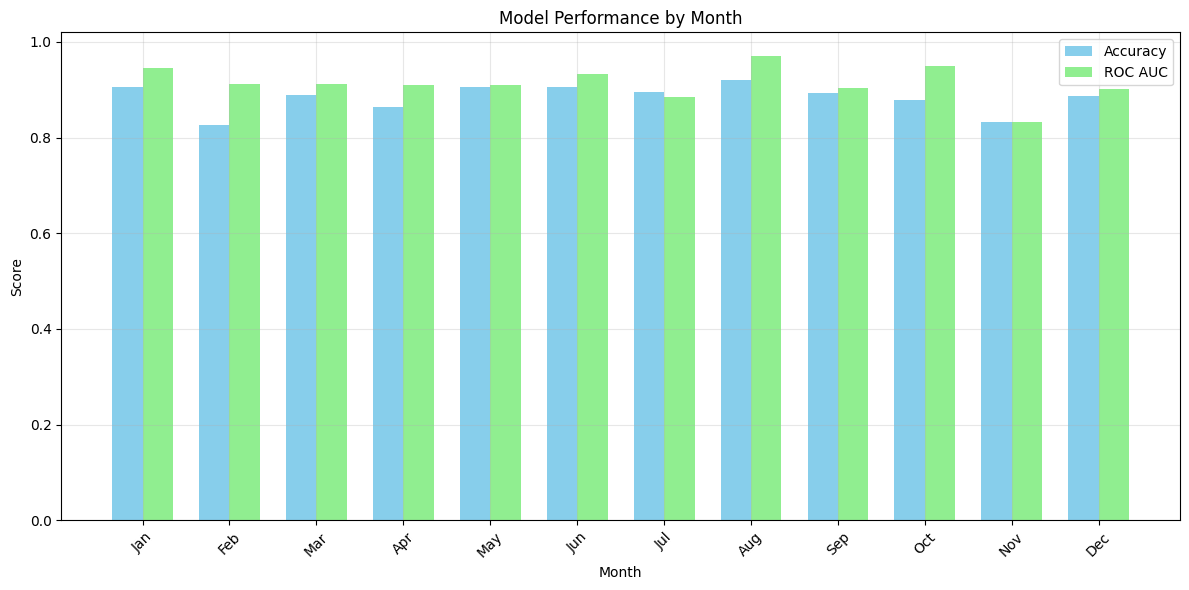


Monthly Performance:
Month     Accuracy    ROC AUC
-----------------------------------
Jan        0.9057    0.9448
Feb        0.8254    0.9114
Mar        0.8882    0.9113
Apr        0.8632    0.9089
May        0.9053    0.9104
Jun        0.9048    0.9334
Jul        0.8951    0.8854
Aug        0.9200    0.9713
Sep        0.8929    0.9032
Oct        0.8779    0.9485
Nov        0.8333    0.8335
Dec        0.8867    0.9008

Overall Model Performance Summary:
Average Accuracy: 0.8855
Average ROC AUC: 0.9151


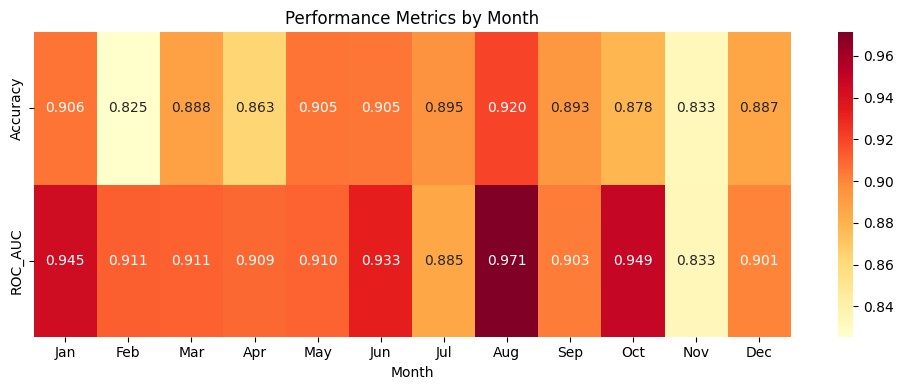

In [34]:
import calendar  # Add this import at the top
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Print feature importance first
print('\nTop 10 Most Important Features for Rain Prediction:')
print(feature_importance.head(10).to_string(index=False))

# Monthly performance analysis
if 'Date' in data.columns:
    # Create a copy of the test data with dates
    test_data = X_test.copy()
    test_data['Date'] = data['Date'].iloc[y_test.index]
    test_data['Date'] = pd.to_datetime(test_data['Date'])
    test_data['Month'] = test_data['Date'].dt.month

    monthly_performance = []

    for month in range(1, 13):
        month_mask = test_data['Month'] == month
        if sum(month_mask) > 0:
            month_acc = accuracy_score(y_test[month_mask], y_pred[month_mask])
            month_auc = roc_auc_score(y_test[month_mask], y_pred_proba[month_mask])
            monthly_performance.append((month, month_acc, month_auc))

    # Plot monthly performance
    plt.figure(figsize=(12, 6))
    months = [calendar.month_abbr[x[0]] for x in monthly_performance]
    accuracies = [x[1] for x in monthly_performance]
    aucs = [x[2] for x in monthly_performance]

    x = np.arange(len(months))
    width = 0.35

    plt.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
    plt.bar(x + width/2, aucs, width, label='ROC AUC', color='lightgreen')

    plt.xlabel('Month')
    plt.ylabel('Score')
    plt.title('Model Performance by Month')
    plt.xticks(x, months, rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print monthly performance table
    print('\nMonthly Performance:')
    print('Month     Accuracy    ROC AUC')
    print('-' * 35)
    for month, acc, auc in monthly_performance:
        month_name = calendar.month_abbr[month]
        print(f'{month_name:<10} {acc:.4f}    {auc:.4f}')

# Print overall performance summary
print('\nOverall Model Performance Summary:')
print(f'Average Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Average ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}')

# Additional visualization: Performance heatmap by month
plt.figure(figsize=(10, 4))
monthly_data = pd.DataFrame(monthly_performance,
                          columns=['Month', 'Accuracy', 'ROC_AUC'])
monthly_data['Month'] = monthly_data['Month'].apply(lambda x: calendar.month_abbr[x])
monthly_data = monthly_data.set_index('Month')

sns.heatmap(monthly_data.T, annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('Performance Metrics by Month')
plt.tight_layout()
plt.show()